In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import os
import gc
import torch
import numpy as np
import matplotlib.pyplot as plt

from src.utils.utils import MyLightningCLI, TrainerWandb

# Different `z_start`

In [3]:
fold_to_path = { 
      0: '/workspace/data/fragments_z_shift_scale/train/1',
      1: '/workspace/data/fragments_z_shift_scale_cropped/train/2a',
      2: '/workspace/data/fragments_z_shift_scale_cropped/train/2b',
      3: '/workspace/data/fragments_z_shift_scale_cropped/train/2c',
      4: '/workspace/data/fragments_z_shift_scale_cropped/train/2d',
      5: '/workspace/data/fragments_z_shift_scale/train/3',
}  

In [4]:
def get_best_checkpoint_path(checkpoint_dir):
    checkpoints = os.listdir(checkpoint_dir)
    checkpoints = sorted(
        [c for c in checkpoints if c.startswith('epoch=')], 
        key=lambda x: int(x.split('step=')[1].split('.')[0])
    )[-1]
    return os.path.join(checkpoint_dir, checkpoints)

In [5]:
for fold in [5]:
    config_path = f'/workspace/scrolls/weights/fold_{fold}/run/files/config_pl.yaml'
    ckpt_path = get_best_checkpoint_path(
        f'/workspace/scrolls/weights/fold_{fold}/checkpoints'
    )

    for z_start in range(0, 53):
        args = [
            'validate',
            '--config', config_path,
            '--ckpt_path', ckpt_path,
            '--data.init_args.batch_size', 4,
            '--data.init_args.crop_size_z', 6,
            '--data.init_args.scale_z_max', 2.0,
            '--data.init_args.z_start', z_start,
            '--data.init_args.z_end', z_start + 12,
            '--data.init_args.val_dir_indices', 0,
            '--data.init_args.surface_volume_dirs', fold_to_path[fold],
        ]
        args = [str(arg) for arg in args]
        cli = MyLightningCLI(
            trainer_class=TrainerWandb, 
            save_config_kwargs={
                'config_filename': 'config_pl.yaml',
                'overwrite': True,
            },
            args=args,
            run=True,
        )
        del cli
        torch.cuda.empty_cache()
        gc.collect()

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '0', '--data.init_args.z_end', '12', '--data.init_args.val_dir_indic

Unknown scale for /workspace/data/fragments_z_shift_scale/train/3, assuming 1.0
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
12it [00:04,  2.92it/s]
Restoring states from the checkpoint path at /workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │   0.025823507457971573    │
│          vl_bce           │    0.1915130913257599     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '1', '--data.init_args.z_end', '13', '--data.init_args.val_dir_indic

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.04014004021883011    │
│          vl_bce           │    0.19416184723377228    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '2', '--data.init_args.z_end', '14', '--data.init_args.val_dir_indic

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │   0.038441091775894165    │
│          vl_bce           │    0.1933891326189041     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '3', '--data.init_args.z_end', '15', '--data.init_args.val_dir_indic

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │   0.024895383045077324    │
│          vl_bce           │    0.1926283985376358     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '4', '--data.init_args.z_end', '16', '--data.init_args.val_dir_indic

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │   0.028044823557138443    │
│          vl_bce           │     0.193980410695076     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '5', '--data.init_args.z_end', '17', '--data.init_args.val_dir_indic

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.04400727525353432    │
│          vl_bce           │    0.19423308968544006    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '6', '--data.init_args.z_end', '18', '--data.init_args.val_dir_indic

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.05318843573331833    │
│          vl_bce           │    0.19449160993099213    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '7', '--data.init_args.z_end', '19', '--data.init_args.val_dir_indic

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.05260699987411499    │
│          vl_bce           │    0.19470056891441345    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '8', '--data.init_args.z_end', '20', '--data.init_args.val_dir_indic

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.05269802734255791    │
│          vl_bce           │    0.1945885270833969     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '9', '--data.init_args.z_end', '21', '--data.init_args.val_dir_indic

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │   0.054591428488492966    │
│          vl_bce           │    0.19589436054229736    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '10', '--data.init_args.z_end', '22', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.05339596047997475    │
│          vl_bce           │    0.19718879461288452    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '11', '--data.init_args.z_end', '23', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.05502307042479515    │
│          vl_bce           │    0.19657552242279053    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '12', '--data.init_args.z_end', '24', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.05663643777370453    │
│          vl_bce           │    0.19501587748527527    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '13', '--data.init_args.z_end', '25', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.0452006496489048     │
│          vl_bce           │    0.1947137862443924     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '14', '--data.init_args.z_end', '26', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.05177144706249237    │
│          vl_bce           │    0.1934569776058197     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '15', '--data.init_args.z_end', '27', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.04358994588255882    │
│          vl_bce           │    0.19123834371566772    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '16', '--data.init_args.z_end', '28', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.04912617802619934    │
│          vl_bce           │    0.1887800544500351     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '17', '--data.init_args.z_end', '29', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.05995691195130348    │
│          vl_bce           │    0.18450751900672913    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '18', '--data.init_args.z_end', '30', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.06246739998459816    │
│          vl_bce           │    0.1802549809217453     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '19', '--data.init_args.z_end', '31', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.07428047060966492    │
│          vl_bce           │    0.1778106987476349     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '20', '--data.init_args.z_end', '32', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.12287342548370361    │
│          vl_bce           │    0.1744515299797058     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '21', '--data.init_args.z_end', '33', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.2423110455274582     │
│          vl_bce           │     0.169606015086174     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '22', '--data.init_args.z_end', '34', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.3344622850418091     │
│          vl_bce           │    0.1622706651687622     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '23', '--data.init_args.z_end', '35', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.4525830149650574     │
│          vl_bce           │    0.15457908809185028    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '24', '--data.init_args.z_end', '36', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.5360507369041443     │
│          vl_bce           │    0.14933355152606964    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '25', '--data.init_args.z_end', '37', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.5926066040992737     │
│          vl_bce           │    0.14389416575431824    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '26', '--data.init_args.z_end', '38', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.6271229982376099     │
│          vl_bce           │    0.13987717032432556    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '27', '--data.init_args.z_end', '39', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.6419622898101807     │
│          vl_bce           │    0.13855795562267303    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '28', '--data.init_args.z_end', '40', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.6227459907531738     │
│          vl_bce           │    0.13939310610294342    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '29', '--data.init_args.z_end', '41', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.5855653882026672     │
│          vl_bce           │    0.14141759276390076    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '30', '--data.init_args.z_end', '42', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.5401456952095032     │
│          vl_bce           │    0.14660918712615967    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '31', '--data.init_args.z_end', '43', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.4468889534473419     │
│          vl_bce           │    0.15616317093372345    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '32', '--data.init_args.z_end', '44', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.3373813331127167     │
│          vl_bce           │    0.16703246533870697    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '33', '--data.init_args.z_end', '45', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.22471144795417786    │
│          vl_bce           │    0.17667508125305176    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '34', '--data.init_args.z_end', '46', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.15324409306049347    │
│          vl_bce           │    0.18514202535152435    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '35', '--data.init_args.z_end', '47', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.0942944660782814     │
│          vl_bce           │    0.19116225838661194    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '36', '--data.init_args.z_end', '48', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │   0.034524720162153244    │
│          vl_bce           │    0.19615629315376282    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '37', '--data.init_args.z_end', '49', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │    0.00475273746997118    │
│          vl_bce           │    0.19884128868579865    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '38', '--data.init_args.z_end', '50', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │   3.131386165478034e-06   │
│          vl_bce           │    0.1993928849697113     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '39', '--data.init_args.z_end', '51', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.19948841631412506    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '40', '--data.init_args.z_end', '52', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.19815558195114136    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '41', '--data.init_args.z_end', '53', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.1968330442905426     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '42', '--data.init_args.z_end', '54', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.19509419798851013    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '43', '--data.init_args.z_end', '55', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.1933363378047943     │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '44', '--data.init_args.z_end', '56', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.19210343062877655    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '45', '--data.init_args.z_end', '57', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.19145305454730988    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '46', '--data.init_args.z_end', '58', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.19034628570079803    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '47', '--data.init_args.z_end', '59', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.19007188081741333    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '48', '--data.init_args.z_end', '60', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.18915635347366333    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '49', '--data.init_args.z_end', '61', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.18775661289691925    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '50', '--data.init_args.z_end', '62', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.18730171024799347    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '51', '--data.init_args.z_end', '63', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.18758516013622284    │
└───────────────────────────┴───────────────────────────┘

/root/miniconda3/envs/scrolls/lib/python3.10/site-packages/lightning/pytorch/cli.py:484: UserWarning: LightningCLI's args parameter is intended to run from within Python like if it were from the command line. To prevent mistakes it is not recommended to provide both args and command line arguments, got: sys.argv[1:]=['--ip=127.0.0.1', '--stdin=9018', '--control=9016', '--hb=9015', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"f79de5a9-2ca2-4fbb-a02a-3d62bb4d8158"', '--shell=9017', '--transport="tcp"', '--iopub=9019', '--f=/root/.local/share/jupyter/runtime/kernel-v2-6806sTYJk3RVLn6A.json'], args=['validate', '--config', '/workspace/scrolls/weights/fold_5/run/files/config_pl.yaml', '--ckpt_path', '/workspace/scrolls/weights/fold_5/checkpoints/epoch=13-step=392.ckpt', '--data.init_args.batch_size', '4', '--data.init_args.crop_size_z', '6', '--data.init_args.scale_z_max', '2.0', '--data.init_args.z_start', '52', '--data.init_args.z_end', '64', '--data.init_args.val_dir_indi

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           v_f05           │            0.0            │
│          vl_bce           │    0.18852850794792175    │
└───────────────────────────┴───────────────────────────┘

# `z_shift` and `z_scale`

python src/scripts/z_shift_scale/build_maps.py --input_dir /workspace/data/fragments/train/1 --downscaled_input_dir /workspace/data/fragments_downscaled_2/train/1 --output_dir /workspace/data/fragments/train/1 --patch_size 256 --downscale_factor 2
python src/scripts/z_shift_scale/build_maps.py --input_dir /workspace/data/fragments/train/2 --downscaled_input_dir /workspace/data/fragments_downscaled_2/train/2 --output_dir /workspace/data/fragments/train/2 --patch_size 256 --downscale_factor 2
python src/scripts/z_shift_scale/build_maps.py --input_dir /workspace/data/fragments/train/3 --downscaled_input_dir /workspace/data/fragments_downscaled_2/train/3 --output_dir /workspace/data/fragments/train/3 --patch_size 256 --downscale_factor 2


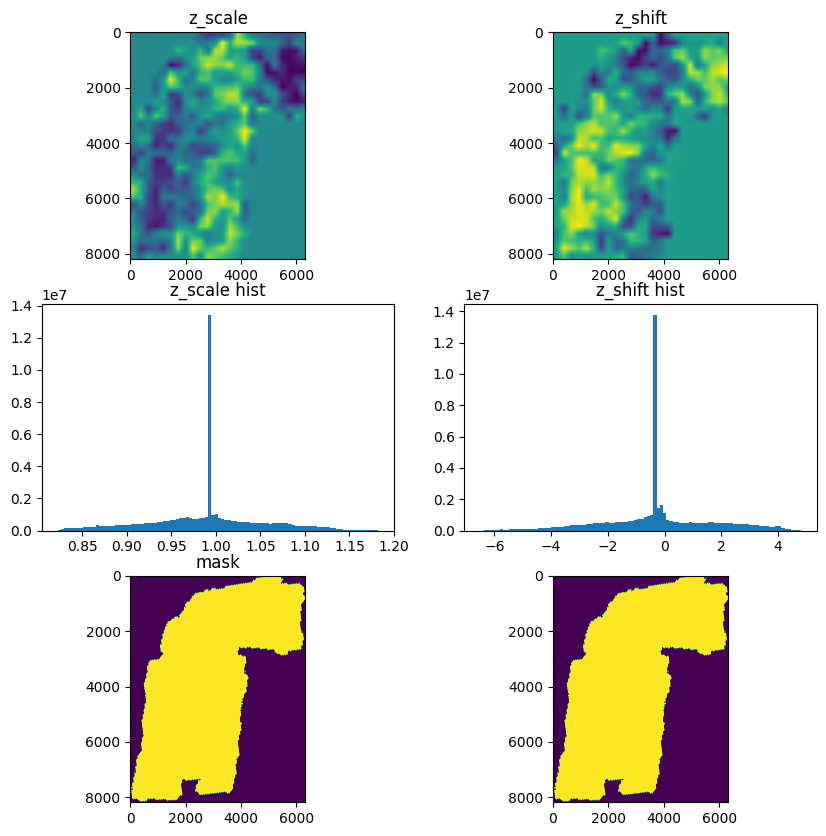

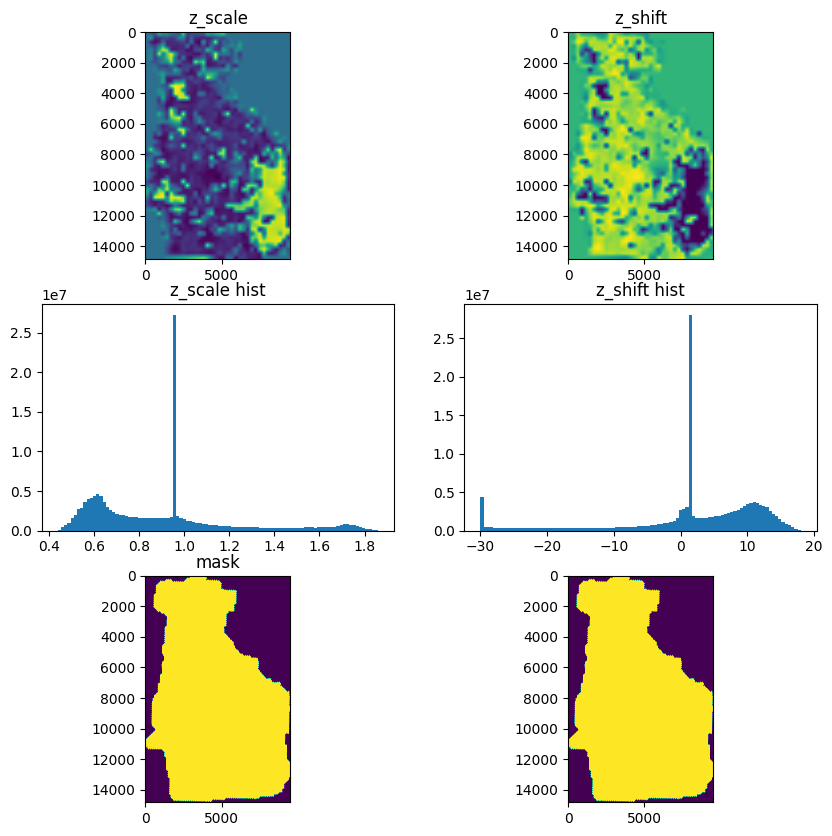

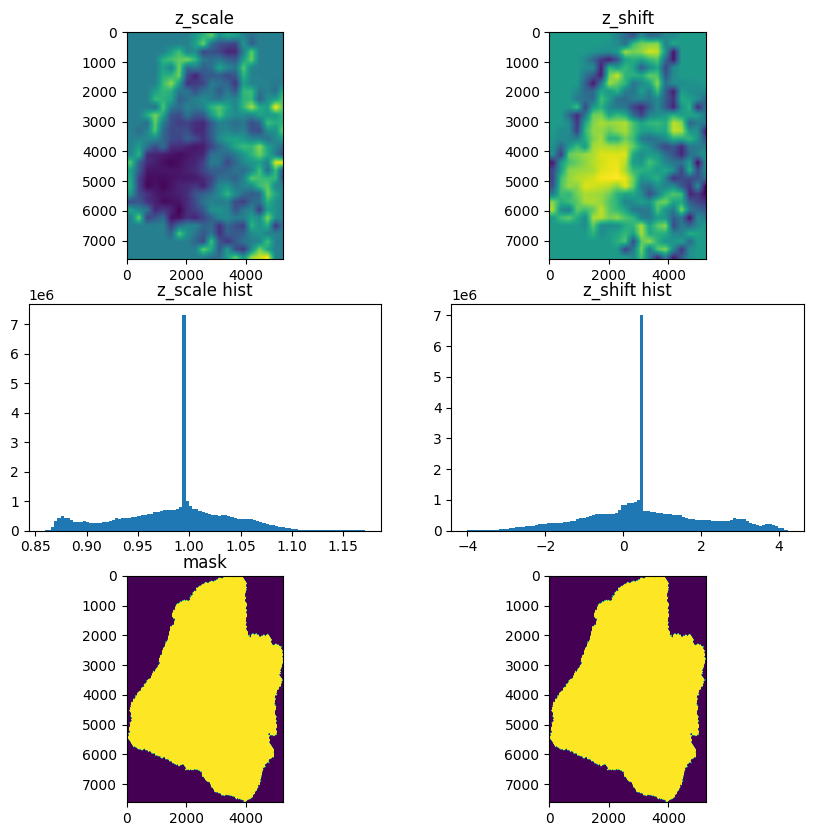

In [44]:
plt.close('all')

fragment_dirs = [
    '/workspace/data/fragments/train/1',
    '/workspace/data/fragments/train/2',
    '/workspace/data/fragments/train/3',
]

for fragment_dir in fragment_dirs:
    with open(f'{fragment_dir}/z_shift_scale_args.txt', 'r') as f:
        run_command = f.read()
    z_scale = np.load(f'{fragment_dir}/z_scale.npy')
    z_shift = np.load(f'{fragment_dir}/z_shift.npy')
    mask = cv2.imread(f'{fragment_dir}/mask.png', cv2.IMREAD_GRAYSCALE)

    print(run_command)

    fig, axes = plt.subplots(3, 2, figsize=(10, 10))
    axes[0, 0].imshow(z_scale)
    axes[0, 0].set_title('z_scale')
    axes[0, 1].imshow(z_shift)
    axes[0, 1].set_title('z_shift')
    axes[1, 0].hist(z_scale.flatten(), bins=100)
    axes[1, 0].set_title('z_scale hist')
    axes[1, 1].hist(z_shift.flatten(), bins=100)
    axes[1, 1].set_title('z_shift hist')
    axes[2, 0].imshow(mask)
    axes[2, 0].set_title('mask')
    overlay = cv2.addWeighted(z_scale, 0.5, mask * (z_scale.max() - z_scale.min()), 0.5, 0)
    axes[2, 1].imshow(overlay)

python src/scripts/z_shift_scale/build_maps.py --input_dir /workspace/data/fragments/train/2 --downscaled_input_dir /workspace/data/fragments_downscaled_2/train/2 --output_dir . --patch_size 256 --downscale_factor 2 --overlap_divider 2


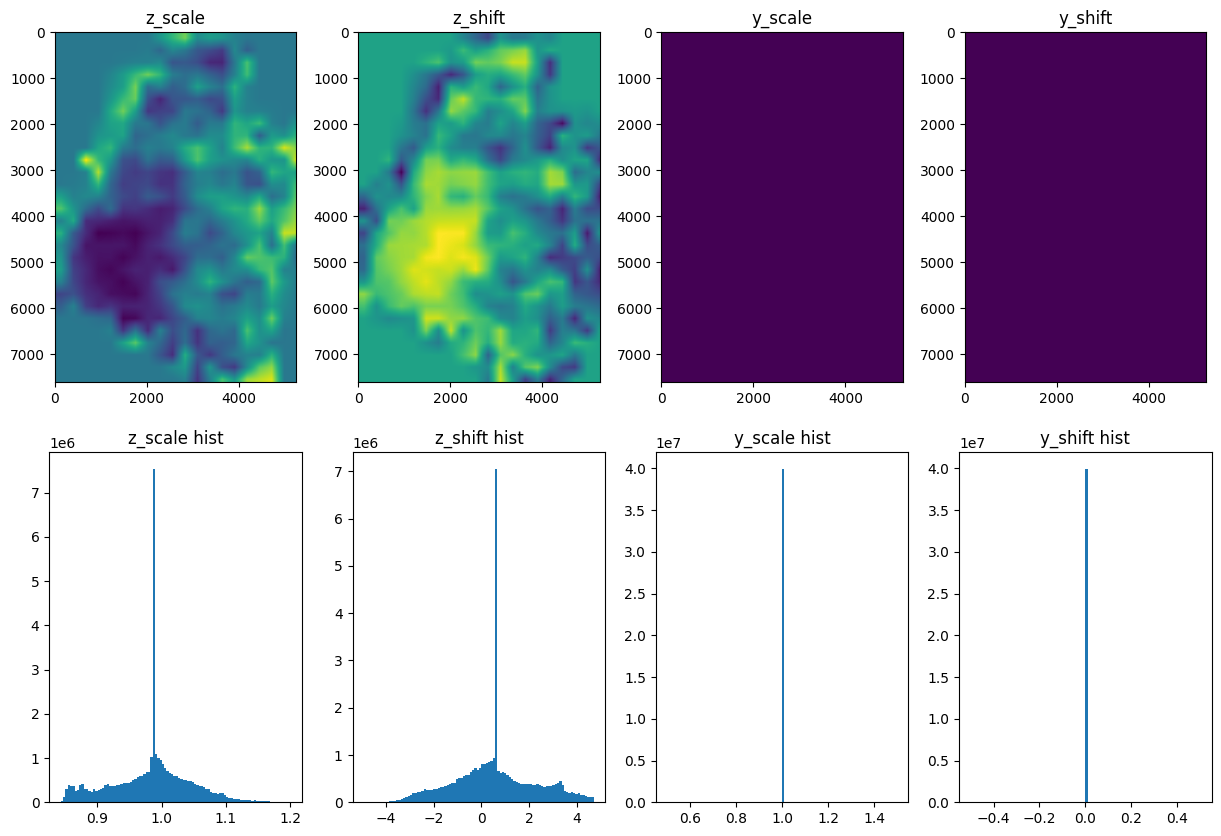

In [13]:
plt.close('all')

fragment_dirs = [
    '/workspace/scrolls',
]

for fragment_dir in fragment_dirs:
    with open(f'{fragment_dir}/z_shift_scale_args.txt', 'r') as f:
        run_command = f.read()
    z_scale = np.load(f'{fragment_dir}/z_scale.npy')
    z_shift = np.load(f'{fragment_dir}/z_shift.npy')
    y_shift = np.load(f'{fragment_dir}/y_shift.npy')
    y_scale = np.load(f'{fragment_dir}/y_scale.npy')

    print(run_command)

    fig, axes = plt.subplots(2, 4, figsize=(15, 10))
    axes[0, 0].imshow(z_scale)
    axes[0, 0].set_title('z_scale')
    axes[0, 1].imshow(z_shift)
    axes[0, 1].set_title('z_shift')
    axes[0, 2].imshow(y_scale)
    axes[0, 2].set_title('y_scale')
    axes[0, 3].imshow(y_shift)
    axes[0, 3].set_title('y_shift')
    axes[1, 0].hist(z_scale.flatten(), bins=100)
    axes[1, 0].set_title('z_scale hist')
    axes[1, 1].hist(z_shift.flatten(), bins=100)
    axes[1, 1].set_title('z_shift hist')
    axes[1, 2].hist(y_scale.flatten(), bins=100)
    axes[1, 2].set_title('y_scale hist')
    axes[1, 3].hist(y_shift.flatten(), bins=100)
    axes[1, 3].set_title('y_shift hist')

python src/scripts/z_shift_scale/build_maps.py --input_dir /workspace/data/fragments/train/2 --downscaled_input_dir /workspace/data/fragments_downscaled_2/train/2 --output_dir . --patch_size 256 --downscale_factor 2 --overlap_divider 2


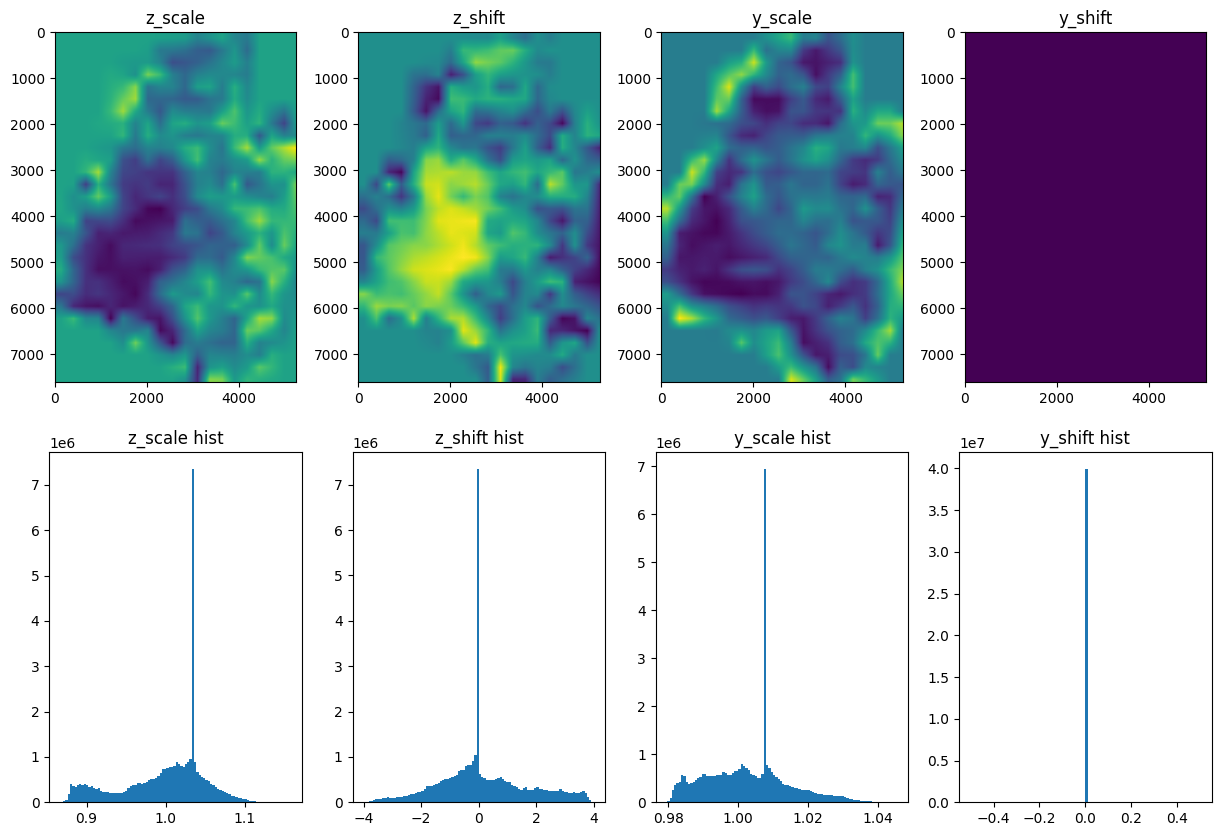

In [14]:
plt.close('all')

fragment_dirs = [
    '/workspace/scrolls',
]

for fragment_dir in fragment_dirs:
    with open(f'{fragment_dir}/z_shift_scale_args.txt', 'r') as f:
        run_command = f.read()
    z_scale = np.load(f'{fragment_dir}/z_scale.npy')
    z_shift = np.load(f'{fragment_dir}/z_shift.npy')
    y_shift = np.load(f'{fragment_dir}/y_shift.npy')
    y_scale = np.load(f'{fragment_dir}/y_scale.npy')

    print(run_command)

    fig, axes = plt.subplots(2, 4, figsize=(15, 10))
    axes[0, 0].imshow(z_scale)
    axes[0, 0].set_title('z_scale')
    axes[0, 1].imshow(z_shift)
    axes[0, 1].set_title('z_shift')
    axes[0, 2].imshow(y_scale)
    axes[0, 2].set_title('y_scale')
    axes[0, 3].imshow(y_shift)
    axes[0, 3].set_title('y_shift')
    axes[1, 0].hist(z_scale.flatten(), bins=100)
    axes[1, 0].set_title('z_scale hist')
    axes[1, 1].hist(z_shift.flatten(), bins=100)
    axes[1, 1].set_title('z_shift hist')
    axes[1, 2].hist(y_scale.flatten(), bins=100)
    axes[1, 2].set_title('y_scale hist')
    axes[1, 3].hist(y_shift.flatten(), bins=100)
    axes[1, 3].set_title('y_shift hist')

python src/scripts/z_shift_scale/build_maps.py --input_dir /workspace/data/fragments/train/2 --downscaled_input_dir /workspace/data/fragments_downscaled_2/train/2 --output_dir . --patch_size 256 --downscale_factor 2 --overlap_divider 2


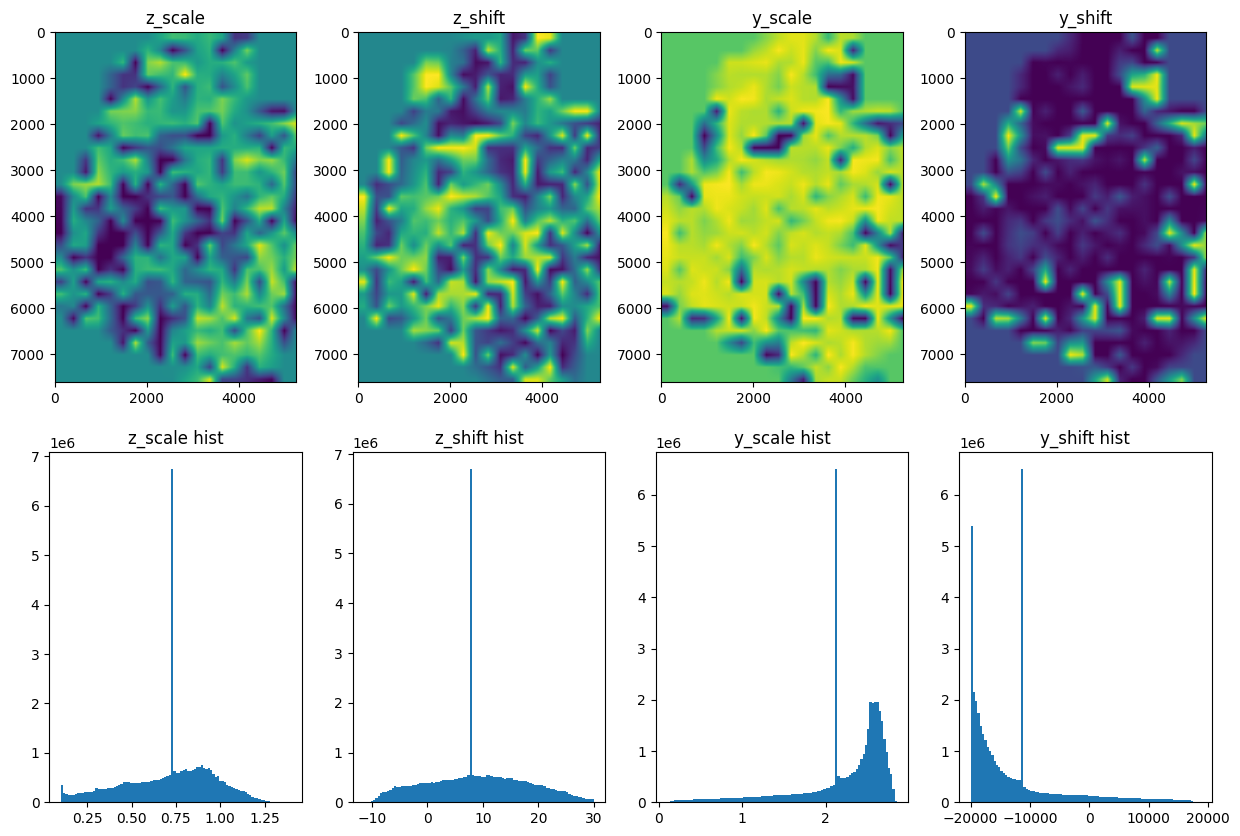

In [15]:
plt.close('all')

fragment_dirs = [
    '/workspace/scrolls',
]

for fragment_dir in fragment_dirs:
    with open(f'{fragment_dir}/z_shift_scale_args.txt', 'r') as f:
        run_command = f.read()
    z_scale = np.load(f'{fragment_dir}/z_scale.npy')
    z_shift = np.load(f'{fragment_dir}/z_shift.npy')
    y_shift = np.load(f'{fragment_dir}/y_shift.npy')
    y_scale = np.load(f'{fragment_dir}/y_scale.npy')

    print(run_command)

    fig, axes = plt.subplots(2, 4, figsize=(15, 10))
    axes[0, 0].imshow(z_scale)
    axes[0, 0].set_title('z_scale')
    axes[0, 1].imshow(z_shift)
    axes[0, 1].set_title('z_shift')
    axes[0, 2].imshow(y_scale)
    axes[0, 2].set_title('y_scale')
    axes[0, 3].imshow(y_shift)
    axes[0, 3].set_title('y_shift')
    axes[1, 0].hist(z_scale.flatten(), bins=100)
    axes[1, 0].set_title('z_scale hist')
    axes[1, 1].hist(z_shift.flatten(), bins=100)
    axes[1, 1].set_title('z_shift hist')
    axes[1, 2].hist(y_scale.flatten(), bins=100)
    axes[1, 2].set_title('y_scale hist')
    axes[1, 3].hist(y_shift.flatten(), bins=100)
    axes[1, 3].set_title('y_shift hist')

python src/scripts/z_shift_scale/build_maps.py --input_dir /workspace/data/fragments/train/2 --downscaled_input_dir /workspace/data/fragments_downscaled_2/train/2 --output_dir . --patch_size 256 --downscale_factor 2 --overlap_divider 2


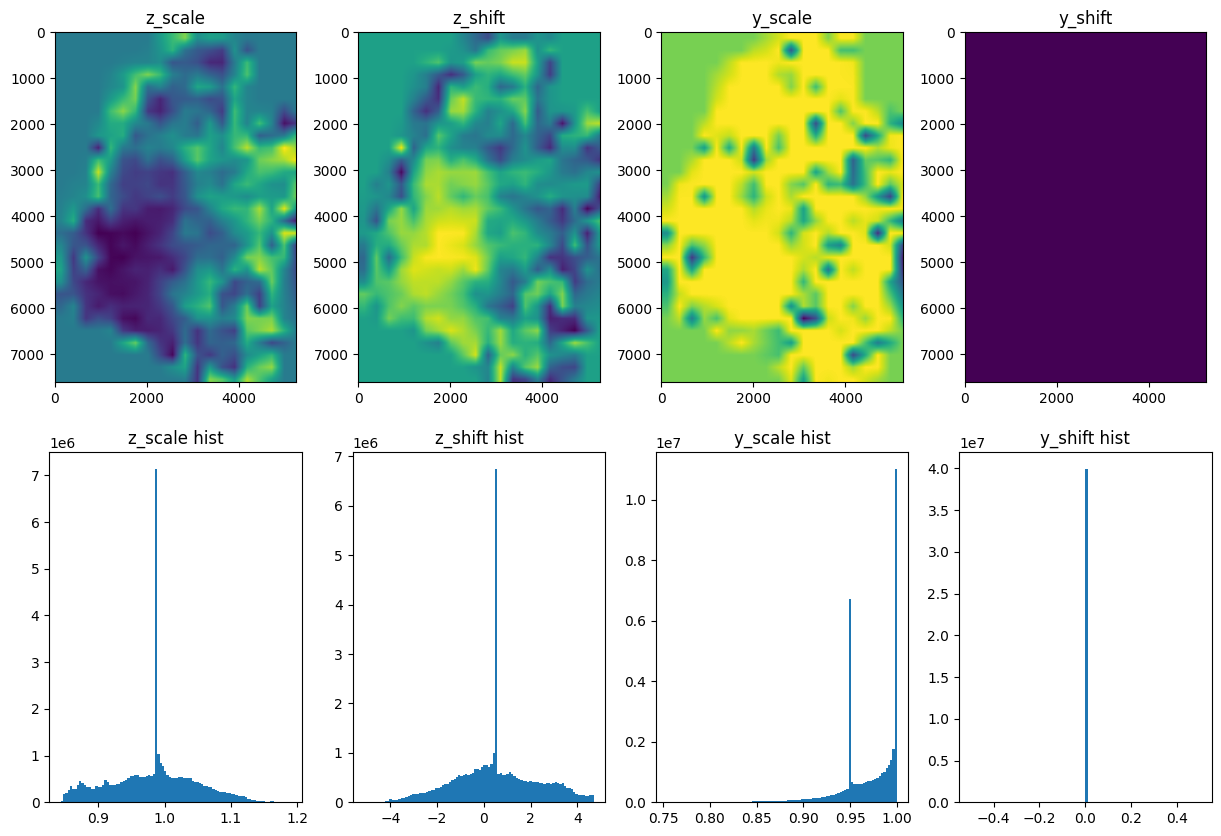

In [16]:
plt.close('all')

fragment_dirs = [
    '/workspace/scrolls',
]

for fragment_dir in fragment_dirs:
    with open(f'{fragment_dir}/z_shift_scale_args.txt', 'r') as f:
        run_command = f.read()
    z_scale = np.load(f'{fragment_dir}/z_scale.npy')
    z_shift = np.load(f'{fragment_dir}/z_shift.npy')
    y_shift = np.load(f'{fragment_dir}/y_shift.npy')
    y_scale = np.load(f'{fragment_dir}/y_scale.npy')

    print(run_command)

    fig, axes = plt.subplots(2, 4, figsize=(15, 10))
    axes[0, 0].imshow(z_scale)
    axes[0, 0].set_title('z_scale')
    axes[0, 1].imshow(z_shift)
    axes[0, 1].set_title('z_shift')
    axes[0, 2].imshow(y_scale)
    axes[0, 2].set_title('y_scale')
    axes[0, 3].imshow(y_shift)
    axes[0, 3].set_title('y_shift')
    axes[1, 0].hist(z_scale.flatten(), bins=100)
    axes[1, 0].set_title('z_scale hist')
    axes[1, 1].hist(z_shift.flatten(), bins=100)
    axes[1, 1].set_title('z_shift hist')
    axes[1, 2].hist(y_scale.flatten(), bins=100)
    axes[1, 2].set_title('y_scale hist')
    axes[1, 3].hist(y_shift.flatten(), bins=100)
    axes[1, 3].set_title('y_shift hist')